   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

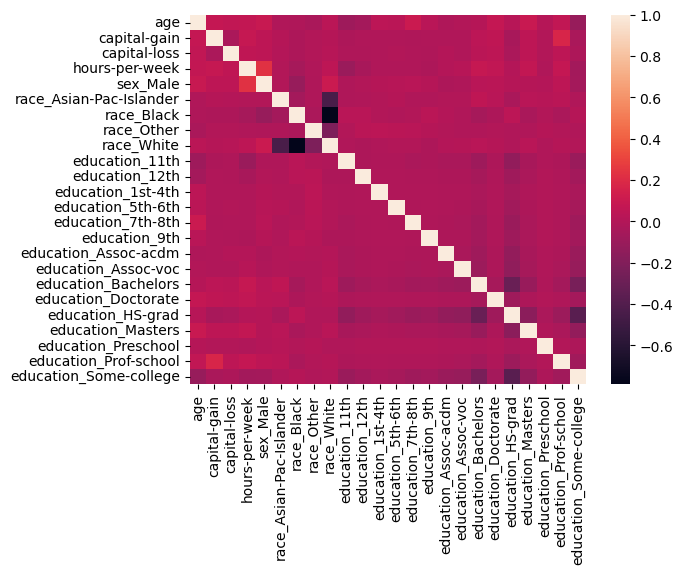

Model Parameters, Intercept: [-5.54629354]
Model Parameters, Coeff: [[ 3.64647296e-02  3.14690818e-04  6.66219472e-04  3.19212564e-02
   1.02871744e+00  0.00000000e+00 -3.76281057e-01  0.00000000e+00
   6.27278048e-02 -5.78154093e-01  0.00000000e+00  0.00000000e+00
  -4.03534444e-01 -8.96190648e-01 -5.03408989e-01  5.69455298e-01
   5.44623277e-01  1.27913077e+00  1.79517316e+00  0.00000000e+00
   1.59657563e+00  0.00000000e+00  1.82230471e+00  3.81849392e-01]]
Confusion Matrix on test set:
[[4779  247]
 [ 878  609]]
Accuracy Score on test set: 0.8272685398433901
                       var      coef
0        education_7th-8th -0.896191
1           education_11th -0.578154
2            education_9th -0.503409
3        education_5th-6th -0.403534
4               race_Black -0.376281
5             capital-gain  0.000315
6             capital-loss  0.000666
7           hours-per-week  0.031921
8                      age  0.036465
9               race_White  0.062728
10  education_Some-coll

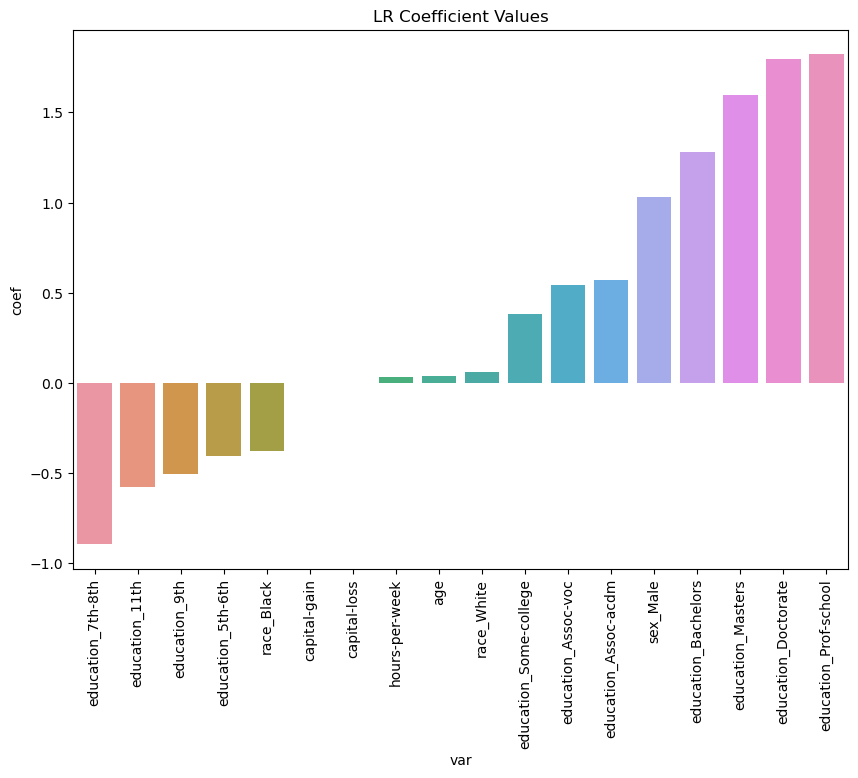

ROC AUC score: 0.8455058577709293


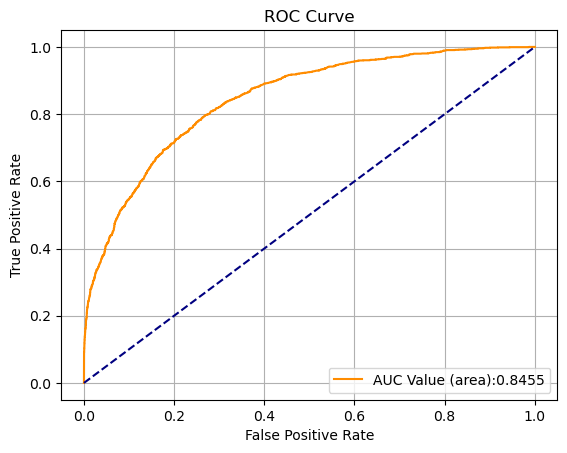

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult_data.csv',header = None, names = col_names)

#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()
print(df.head())

#1. Check Class Imbalance
print(df.income.value_counts())


#2. Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'sex','race', 'hours-per-week', 'education']
X = pd.get_dummies(df[feature_cols], drop_first=True)

#3. Create a heatmap of X data to see feature correlation
plt.figure()
sns.heatmap(X.corr())#, annot=True)
plt.show()
plt.close()

#4. Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greater than 50k
y = np.where(df.income=='<=50K', 0, 1)

#5a. Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.2)

#5b. Fit LR model with sklearn on train set, and predicting on the test set
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

#6. Print model parameters (intercept and coefficients)
print('Model Parameters, Intercept:', log_reg.intercept_)

print('Model Parameters, Coeff:', log_reg.coef_)

#7. Evaluate the predictions of the model on the test set. Print the confusion matrix and accuracy score.
print('Confusion Matrix on test set:')
print(confusion_matrix(y_test, y_pred))
print('Accuracy Score on test set:', log_reg.score(x_test, y_test))

# 8.Create new DataFrame of the model coefficients and variable names; sort values based on coefficient
coef_df = pd.DataFrame(zip(x_train.columns, log_reg.coef_[0]), columns=['var', 'coef']).sort_values('coef')
coef_df = coef_df[coef_df.coef.abs()>0].sort_values('coef').reset_index(drop=True)
print(coef_df)

#9. barplot of the coefficients sorted in ascending order
plt.figure(figsize = (10,7))
sns.barplot(data=coef_df, x='var', y='coef')
plt.xticks(rotation=90);
plt.title('LR Coefficient Values')
plt.show()
plt.close()
#10. Plot the ROC curve and print the AUC value.
y_pred_prob = log_reg.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
auc_value = roc_auc_score(y_test,y_pred_prob[:,1])
print(f'ROC AUC score: {auc_value}')
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='AUC Value (area):'+str(np.round(auc_value, 4)) )
plt.plot([0,1],[0,1], color='navy',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()
plt.close()

